# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading the training dataset
train_df = pd.read_excel(r'Data_Train.xlsx')

In [3]:
#checking the training dataset
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#checking the datatypes of the columns of the dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#checking the shape of the dataset.
train_df.shape

(10683, 11)

In [6]:
#checking the statistical descirption of the dataset.
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# check for the null values.
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As per the observations there are some null values found in the Route and Total_Stops column so we have to remove it using the dropna() function.

In [8]:
# Dropping the null values.
train_df.dropna(inplace=True)

In [9]:
# checking for the numerical & categorical columns
numeric_features=[feature for feature in train_df.columns if train_df[feature].dtype != 'O']
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtype == 'O']
#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')  

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [10]:
#Again checking for the null values.
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

As we can see that there are no null values present in the dataset.

In [11]:
#Checking for the top 10 best selling air tickit as per the dataset
train_df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

In [12]:
aviation_company_airline = train_df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


# Analysis on Date_of_Journey column

In the training dataset we can see that Date_of Journey column is present our ML algorithm will not be able to understand date format so we have to extract the useful information like Journey_Date and Journey_Month out of this column.

In [13]:
# Extracting the journey day from the Date_of_Journey column
train_df["journey_Date"]= pd.to_datetime(train_df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [14]:
# Extracting the journey month from the Date_of_Journey column
train_df["journey_Month"]= pd.to_datetime(train_df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [15]:
#Dropping the Date_of_Journey column as we have extracted all the useful information out of it.
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [16]:
# now chekcing the training dataset.
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Analysis on the Departure_Time column

Departure_Time column is in the time format so our ML algorithm will not understand this datatype as it only understand only numbers so, we have to extract the Departure_Time and Deparuture_Minute out of it.

In [17]:
# Extracting Hours from the Dep_Time column
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour

In [18]:
#Extracting minutes from the Dep_Time column.
train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

In [19]:
#Now we will drop the Dep_Time column as it is of no use.
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [20]:
#now checking for the training dataset.
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Analysis on the Arrival_Time column

In the training dataset we can see that Arrival_TIme column is present our ML algorithm will not be able to understand time format so we have to extract the useful information like Arrival_Hour and Arrival_Minute out of this column.

In [21]:
# Extracting the hours from Arrival time column
train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour

In [22]:
#Extracting minutes from the arrival time column
train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [23]:
# Dropping the Arrival Time column
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [24]:
# Check for the training data
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Analysis on the Duration column.

Here the duration is basically the time difference between the departure time and the arrival time so we have to extract the duration hour and the duration minute from this column and drop the main duration column.

In [25]:
duration = list(train_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

#we will remove the Durtaion column
train_df.drop(['Duration'],axis=1,inplace=True)

In [26]:
#now checking the training dataset
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


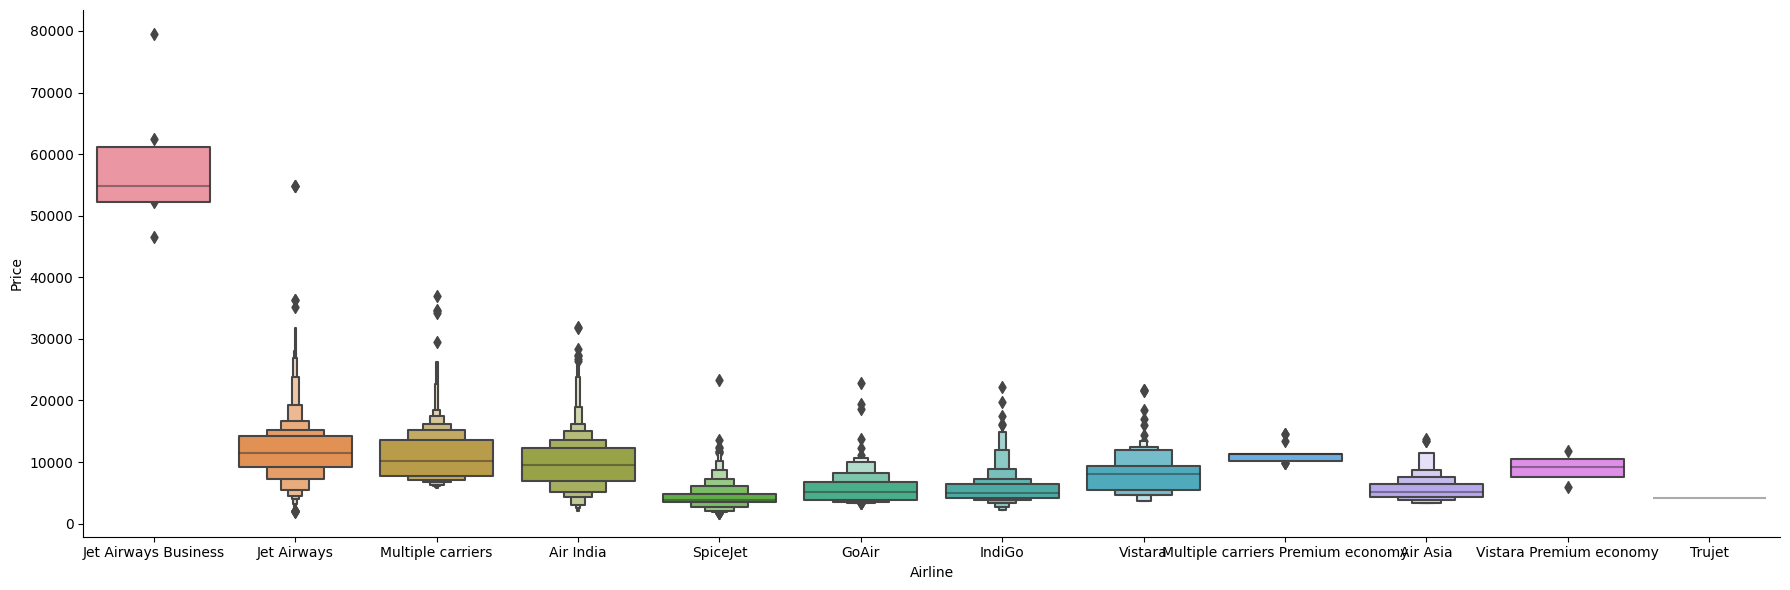

In [27]:
#checking that whic is the costliest airline company according to the dataset.
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# One hot encoding for the Airline column

In [28]:
#OneHotEncoding -----> Nominal data
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(train_df['Airline'],drop_first=False)

# One hot encoding for the Source column

In [29]:
#OneHotEncoding -----> Nominal data
Source = train_df[["Source"]]
Source = pd.get_dummies(train_df['Source'],drop_first=True)

# One hot encoding for the Destination column

In [30]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [31]:
# Now checking for the training dataset.
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Here Additional information and Route is not at all the important column so we are going to drop it

In [32]:
train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [33]:
#Nominal encoding of the Total_stops column
train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


<AxesSubplot: >

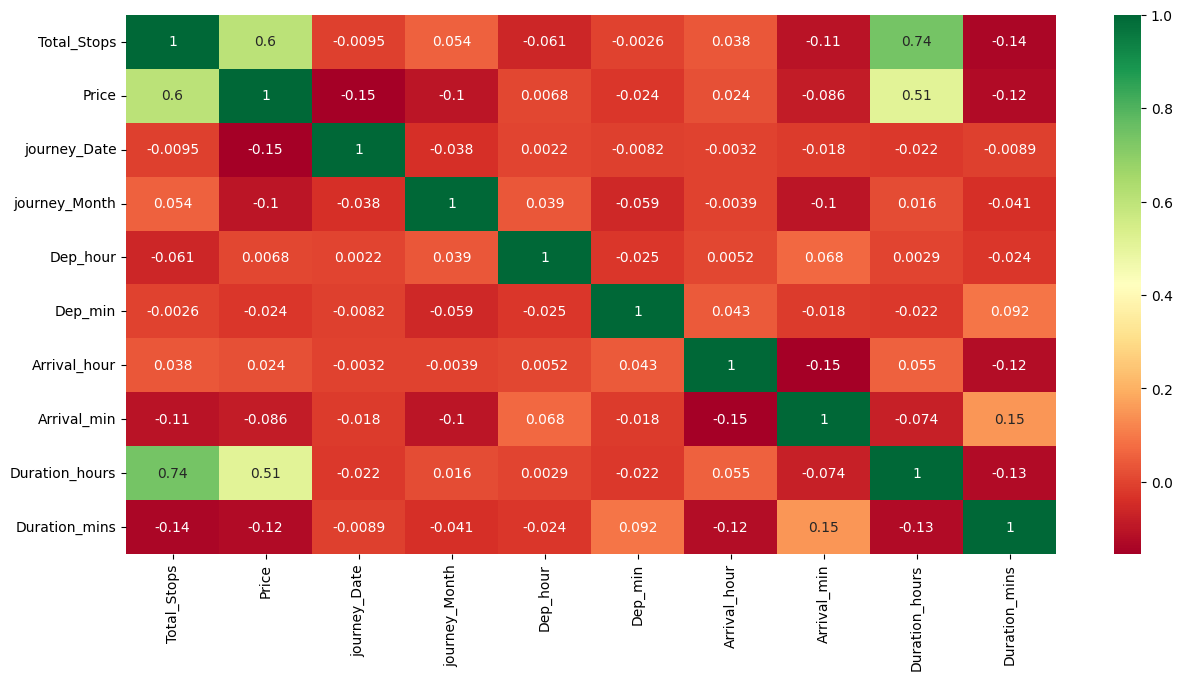

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),annot = True, cmap = "RdYlGn")

In [35]:
#Concatenate dataframe --> df+ Airline + Source + Destination
training_df = pd.concat([train_df,Airline , Source, Destination],axis=1)

# we have drop the varibles
training_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
training_df.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Analysis on the Test Data

In [36]:
test_df = pd.read_excel("Test_set.xlsx")

In [37]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
# Preprocessing the testing dataset.

print(test_df.info())

test_df.dropna(inplace = True)
print(test_df.isnull().sum())

# Date_of_Journey
test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey_month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins
test_df.drop(["Duration"], axis = 1, inplace = True)

# Categorical data
print("Airline")
print("-"*75)
print(test_df["Airline"].value_counts())
Airline = pd.get_dummies(test_df["Airline"], drop_first= True)

print(test_df["Source"].value_counts())
Source = pd.get_dummies(test_df["Source"], drop_first= True)

print(test_df["Destination"].value_counts())
Destination = pd.get_dummies(test_df["Destination"], drop_first = True)

test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
testing_data = pd.concat([test_df, Airline, Source, Destination], axis = 1)

testing_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", testing_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

# Dividing the training dataset into features and labels.

In [39]:
x= training_df[['Total_Stops', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [40]:
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
y = training_df['Price']

In [42]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Train Test Split

In [43]:
#Splitting the data into the training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state=100)

## Applying the Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
# calculating the accuracy of the testing data
random_forest_regressor.score(x_test, y_test)

0.8209515912779748

In [46]:
# calculating the accuracy of the traning data
random_forest_regressor.score(x_train, y_train)

0.9542402957126468

In [47]:
y_pred = random_forest_regressor.predict(x_test)

<AxesSubplot: xlabel='Price', ylabel='Density'>

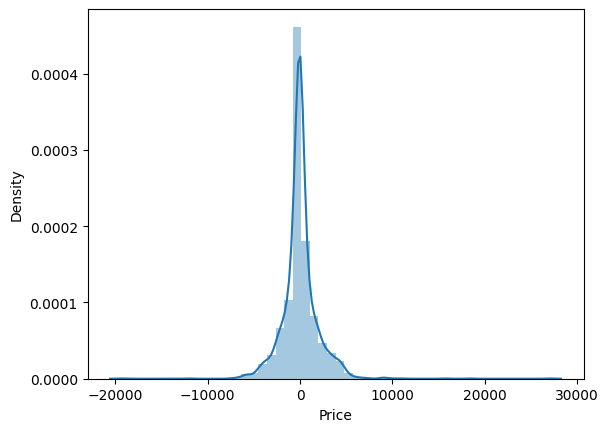

In [48]:
sns.distplot(y_test-y_pred)

In [49]:
from sklearn import metrics

In [50]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

MAE:  1186.2780084299202


In [51]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

MSE:  3880021.6064054817


In [52]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  1969.7770448468227


# Hyper-Parameter Tuning

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [54]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [56]:
random_forest_regresor=RandomForestRegressor(n_estimators=300,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15)

In [57]:
random_forest_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)

In [58]:
#Accuracy of the trianing data after the hyper-parameter tuning.
random_forest_regresor.score(x_train,y_train)

0.8941261787268455

In [59]:
#Accuracy of the testing data after the hyper-parameter tuning.
random_forest_regresor.score(x_test,y_test)

0.8358984808088862

# Importing the model to pickle file

In [60]:
import pickle
file = open('flight_fare_prediction.pkl', 'wb')
pickle.dump(random_forest_regresor, file)

In [61]:
model = open('flight_fare_prediction.pkl','rb')
flight_fare_pedictor = pickle.load(model)

In [62]:
flight_fare_pedictor.score(x_test,y_test)

0.8358984808088862

In [63]:
flight_fare_pedictor.score(x_test,y_test)

0.8358984808088862